# Porto Seguro - Porto Seguro’s Safe Driver Prediction

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers. 


## Exploring the Data


In [46]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
submission = pd.read_csv("output/sample_submission.csv")
print ("data loaded!")

data loaded!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [47]:

train['output'] = train['target']



# TODO: Calculate number of students
n_rows = train.shape[0]

# TODO: Calculate number of features
n_features = train.shape[1]-1

# TODO: Calculate passing students
n_nao = (train.loc[train['target'] == 0]).shape[0]

# TODO: Calculate failing students
n_sim = (train.loc[train['target'] == 1]).shape[0]

# TODO: Calculate graduation rate
rate = (float(n_sim) / float(n_rows))* 100

# Print the results
print ("Total de linhas: {}".format(n_rows))
print ("Total de features: {}".format(n_features))
print ("Qu(antidade de nao ocorrencia: {}".format(n_nao))
print ("Quantidade de ocorrencia: {}".format(n_sim))
print ("Percentual: {:.2f}%".format(rate))


train = train.drop(['target','id'] ,axis=1)
test = test.drop('id' ,axis=1)

Total de linhas: 595212
Total de features: 59
Qu(antidade de nao ocorrencia: 573518
Quantidade de ocorrencia: 21694
Percentual: 3.64%


In [48]:
train.head()


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,output
0,7,2,2,5,1,0,0,1,0,0,...,1,5,8,0,1,1,0,0,1,0
1,9,1,1,7,0,0,0,0,1,0,...,1,1,9,0,1,1,0,1,0,0
2,13,5,4,9,1,0,0,0,1,0,...,2,7,7,0,1,1,0,1,0,0
3,16,0,1,2,0,0,1,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,1,1,3,0,0,0,1,1,0,0


In [49]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


## Preparing the Data
Unbaleced data can be an issue

### Identify feature and target columns


In [50]:
# Extract feature columns
feature_cols = list(train.columns[:-1])

# Extract target column 'passed'
target_col = train.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = train[feature_cols]
y_all = train[target_col]

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())



Feature columns:
['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

Target column: output

Feature values:
   id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_

### Preprocess Feature Columns



In [51]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
       # if col_data.dtype == object:
        #    col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}")

Processed feature columns ({} total features):
{}


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [52]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
#num_train = 300

# Set the number of testing points
#num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

#X_train = None
#X_test = None
#y_train = None
#y_test = None

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 476169 samples.
Testing set has 119043 samples.


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [53]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for bproth training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [54]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=0)
clf_B = svm.SVC(random_state=0)
clf_C = RandomForestClassifier(random_state=0)


print("#################Decision tree#################")
train_predict(clf_A, X_train, y_train, X_test, y_test)

#print("#################SVM#################")
#train_predict(clf_B, X_train, y_train, X_test, y_test)

print("#################ENSEMBLE-RANDOM FOREST#################")
train_predict(clf_C, X_train, y_train, X_test, y_test)



#################Decision tree#################
Training a DecisionTreeClassifier using a training set size of 476169. . .
Trained model in 82.8966 seconds
Made predictions in 1.5632 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.3915 seconds.
F1 score for test set: 0.0572.
#################ENSEMBLE-RANDOM FOREST#################
Training a RandomForestClassifier using a training set size of 476169. . .
Trained model in 63.6319 seconds
Made predictions in 8.9427 seconds.
F1 score for training set: 0.8597.
Made predictions in 2.2681 seconds.
F1 score for test set: 0.0000.


[[109123   5535]
 [  4093    292]]


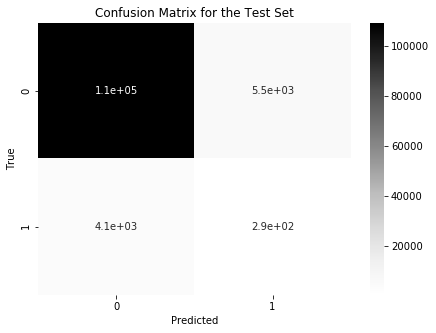

In [55]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf_A.predict(X_test))

print(cm_test)

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

In [56]:
print(clf_A.predict(test))

submission_output = submission

submission_output['target'] = clf_A.predict(test)


submission_output.to_csv('output/submission_output.csv',index=False)

print ("File generated!")


[0 1 0 ..., 0 0 0]
File generated!
